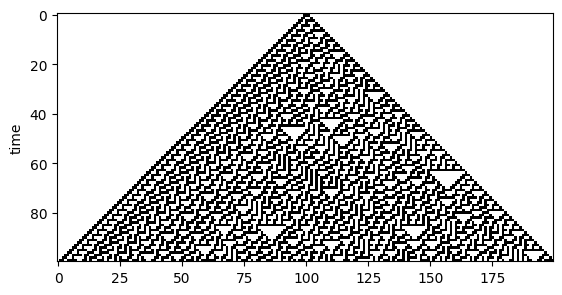

In [1]:
import cellpylib as cpl

cellular_automaton = cpl.init_simple(200)
# cellular_automaton = cpl.init_random(200)

# evolve the cellular automaton for 100 time steps
cellular_automaton = cpl.evolve(cellular_automaton, timesteps=100, memoize=True,
                                apply_rule=lambda n, c, t: cpl.nks_rule(n, 30))

cpl.plot(cellular_automaton)


Elapsed: 0.14 seconds


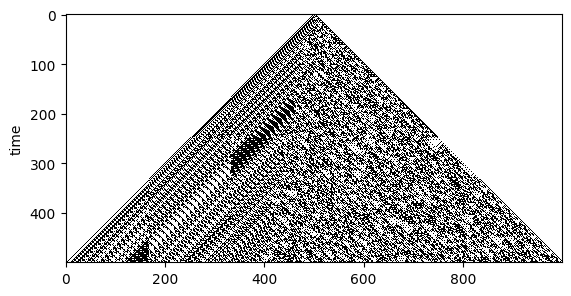

In [3]:
import cellpylib as cpl
import time

start = time.time()
cellular_automaton = cpl.evolve(cpl.init_simple(1000), timesteps=500,
           apply_rule=lambda n, c, t: cpl.nks_rule(n, 30), memoize=True)

print(f"Elapsed: {time.time() - start:.2f} seconds")
cpl.plot(cellular_automaton)


[17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]


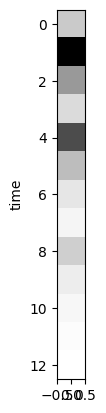

In [6]:
import cellpylib as cpl
import numpy as np


initial = np.array([[17]], dtype=int)


def activity_rule(n, c, t):
    n = n[1]
    if n % 2 == 0:
        # number is even
        return n / 2
    else:
        return 3*n + 1


cellular_automaton = cpl.evolve(initial, apply_rule=activity_rule,
                                timesteps=lambda ca, t: True if ca[-1][0] != 1 else False)

print([i[0] for i in cellular_automaton])
cpl.plot(cellular_automaton)


[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.25, 0.5, 0.75, 0.5, 0.25, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.125, 0.375, 0.75, 0.875, 0.75, 0.375, 0.125, 0.0, 0.0],
 [0.0, 0.0625, 0.25, 0.625, 0.0, 0.1875, 0.0, 0.625, 0.25, 0.0625, 0.0],
 [0.03125, 0.15625, 0.46875, 0.4375, 0.40625, 0.09375, 0.40625, 0.4375, 0.46875, 0.15625, 0.03125]]


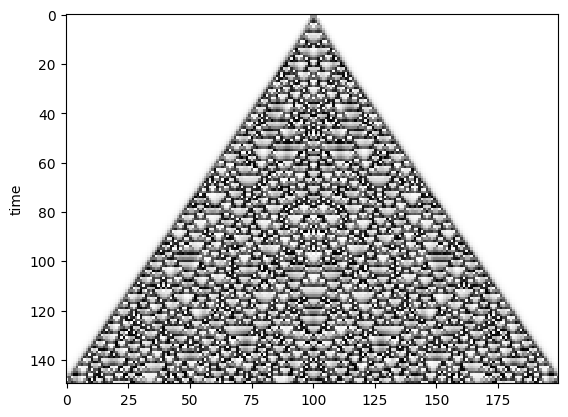

In [7]:
import math
from pprint import pprint

import numpy as np

import cellpylib as cpl

cellular_automaton = cpl.init_simple(200, dtype=np.float64)


# NKS page 157
def apply_rule(n, c, t):
    result = (sum(n) / len(n)) * (3 / 2)
    frac, whole = math.modf(result)
    return frac

cellular_automaton = cpl.evolve(cellular_automaton, timesteps=150,
                                apply_rule=apply_rule)

pprint(cellular_automaton[:6, 95:106].tolist(), width=100)

cpl.plot(cellular_automaton)

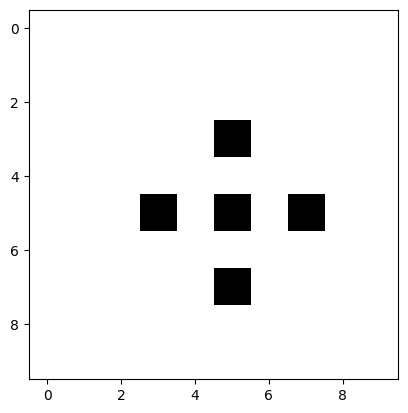

In [8]:
import cellpylib as cpl

ctrbl_rule = cpl.CTRBLRule(rule_table={
    (0, 1, 0, 0, 0): 1,
    (1, 1, 0, 0, 0): 0,
    (0, 0, 0, 0, 0): 0,
    (1, 0, 0, 0, 0): 1,
    (0, 0, 1, 1, 0): 0,
    (1, 1, 1, 1, 1): 1,
    (0, 1, 0, 1, 0): 0,
    (1, 1, 1, 0, 1): 1,
    (1, 0, 1, 0, 1): 1,
    (0, 1, 1, 1, 1): 1,
    (0, 0, 1, 1, 1): 0,
    (1, 1, 0, 0, 1): 1
}, add_rotations=True)

cellular_automaton = cpl.init_simple2d(rows=10, cols=10)

cellular_automaton = cpl.evolve2d(cellular_automaton, timesteps=60,
                                  apply_rule=ctrbl_rule, neighbourhood="von Neumann")

cpl.plot2d_animate(cellular_automaton)


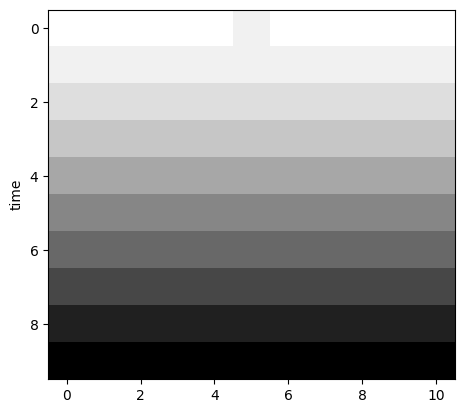

In [9]:
import cellpylib as cpl
from collections import defaultdict


class CustomRule(cpl.BaseRule):

    def __init__(self):
        self.count = defaultdict(int)

    def __call__(self, n, c, t):
        self.count[c] += 1
        return self.count[c]


rule = CustomRule()

cellular_automaton = cpl.init_simple(11)

cellular_automaton = cpl.evolve(cellular_automaton, timesteps=10,
                                apply_rule=rule)

cpl.plot(cellular_automaton)


density of 1s: 0.47651006711409394


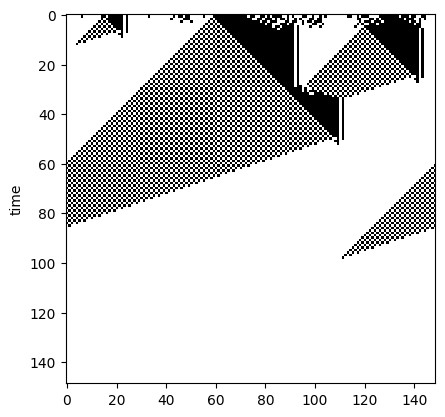

In [11]:
import cellpylib as cpl
import numpy as np

cellular_automaton = cpl.init_random(149)

print("density of 1s: %s" % (np.count_nonzero(cellular_automaton) / 149))

# M. Mitchell et al. discovered this rule using a Genetic Algorithm
rule_number = 6667021275756174439087127638698866559

cellular_automaton = cpl.evolve(cellular_automaton, timesteps=149,
                                apply_rule=lambda n, c, t: cpl.binary_rule(n, rule_number), r=3)

cpl.plot(cellular_automaton)
